In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [12]:
df=pd.read_csv('Global YouTube Statistics.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [160]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [36]:
df_cleaned.isna().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

In [116]:
df=df.replace('nan',pd.NA)
numeric_columns = ['rank', 'subscribers', 'video views', 'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
                   'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'Unemployment rate']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df = df.dropna()

top_10_subscribers = df.nlargest(10, 'subscribers')

In [30]:
top_10_subscriber

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
11,12,WWE,96000000,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,600000.0,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
13,14,BLACKPINK,89800000,3.214460e+10,People & Blogs,BLACKPINK,543,South Korea,KR,Music,...,700000.0,2016.0,Jun,29.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


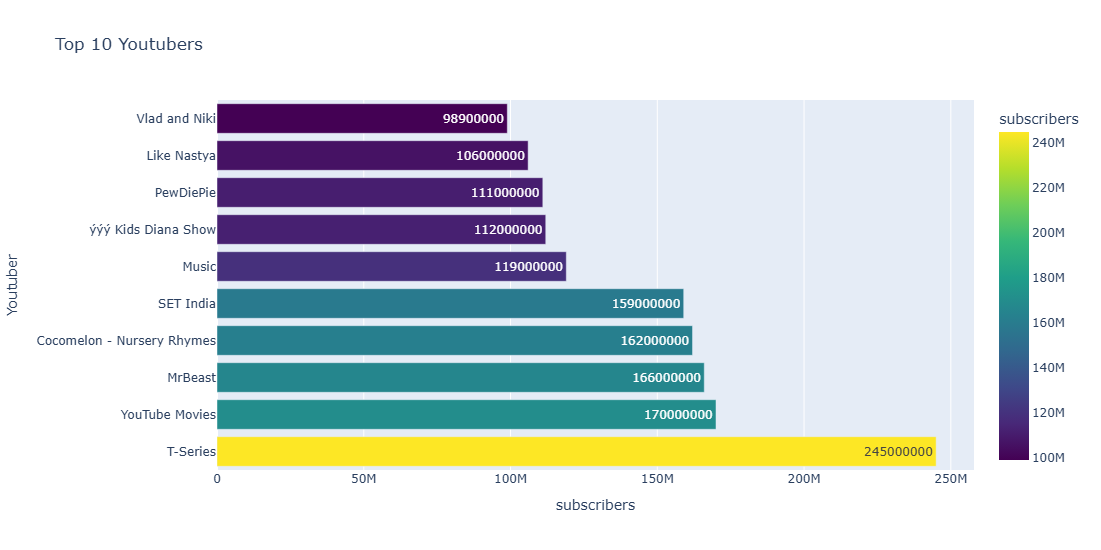

In [64]:
fig=px.bar(df.nlargest(10,'subscribers')[['Youtuber','subscribers']],x='subscribers',y='Youtuber',title='Top 10 Youtubers',text='subscribers',orientation='h',color='subscribers',color_continuous_scale='viridis')
fig.update_layout(width=1000,height=550)
fig.show()

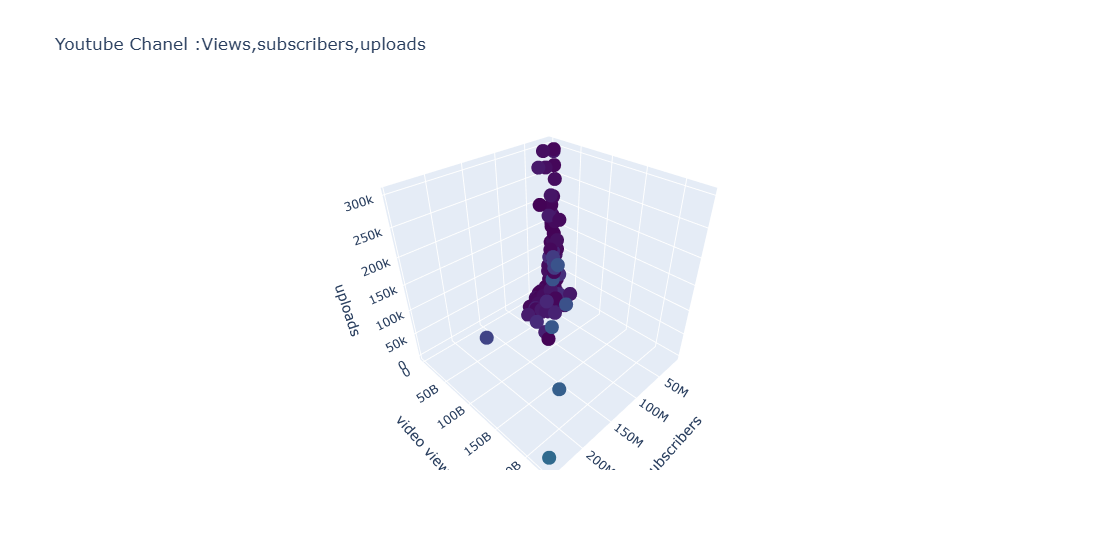

In [120]:
fig=go.Figure(go.Scatter3d(x=df.subscribers,y=df['video views'],z=df.uploads,mode='markers',marker=dict(size=8,color=df['video_views_for_the_last_30_days'],colorscale='viridis')))
fig.update_layout(width=1000,height=550,title='Youtube Chanel :Views,subscribers,uploads',scene=dict(xaxis_title='subscribers',yaxis_title='video views',zaxis_title='uploads'))
fig.show()

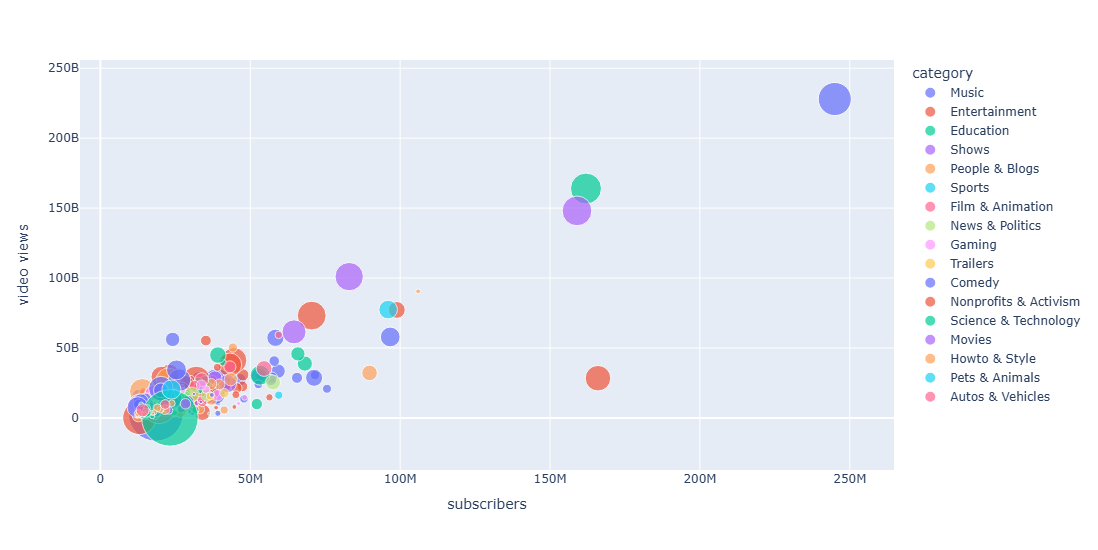

In [128]:
fig=px.scatter(df,x='subscribers',y='video views',size='video_views_for_the_last_30_days',color='category',hover_name='Youtuber',hover_data=['Country'],size_max=40)
fig.update_layout(width=1000,height=550)
fig.show()

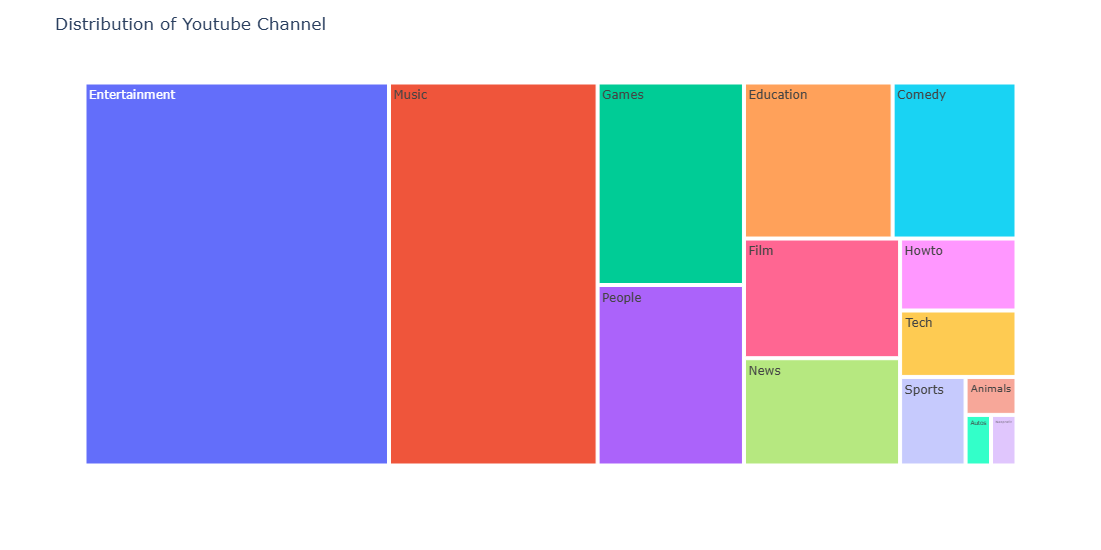

In [144]:
a=df.groupby('channel_type').agg({'Youtuber':'count'}).reset_index()
fig=px.treemap(a,path=['channel_type'],values='Youtuber')
fig.update_layout(width=1000,height=550,title='Distribution of Youtube Channel')

In [164]:
earnings=['lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings']
earnings_df=df[earnings]

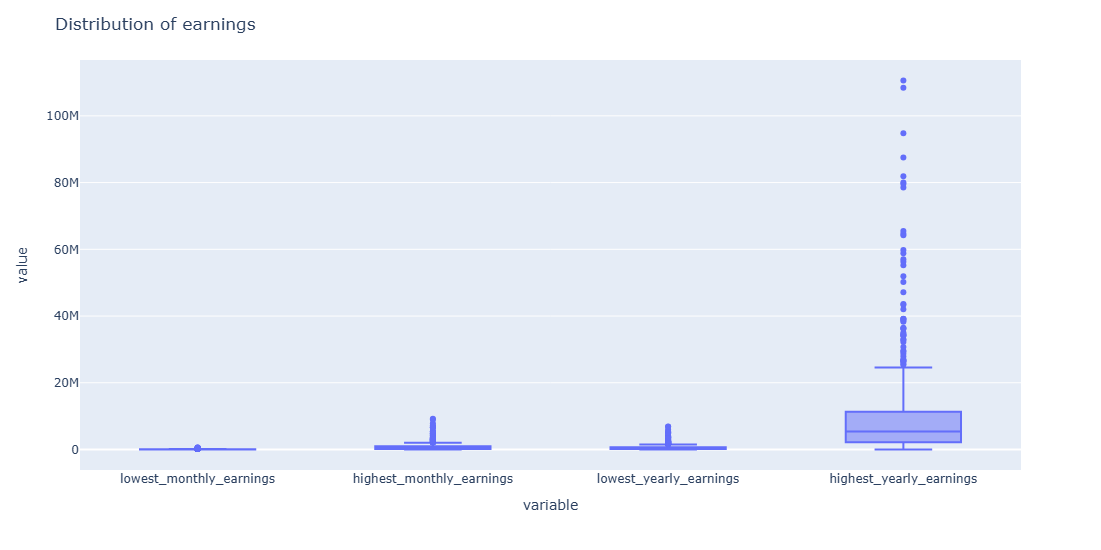

In [172]:
fig=px.box(earnings_df)
fig.update_layout(width=1000,height=550,title='Distribution of earnings')

In [226]:
chanel_in_year=df['created_year'].value_counts()
chanel_in_year=pd.DataFrame(chanel_in_year)
chanel_in_year=chanel_in_year.reset_index()
chanel_in_year.created_year=chanel_in_year.created_year.astype('int')
chanel_in_year=chanel_in_year.drop(axis=0,index=17)

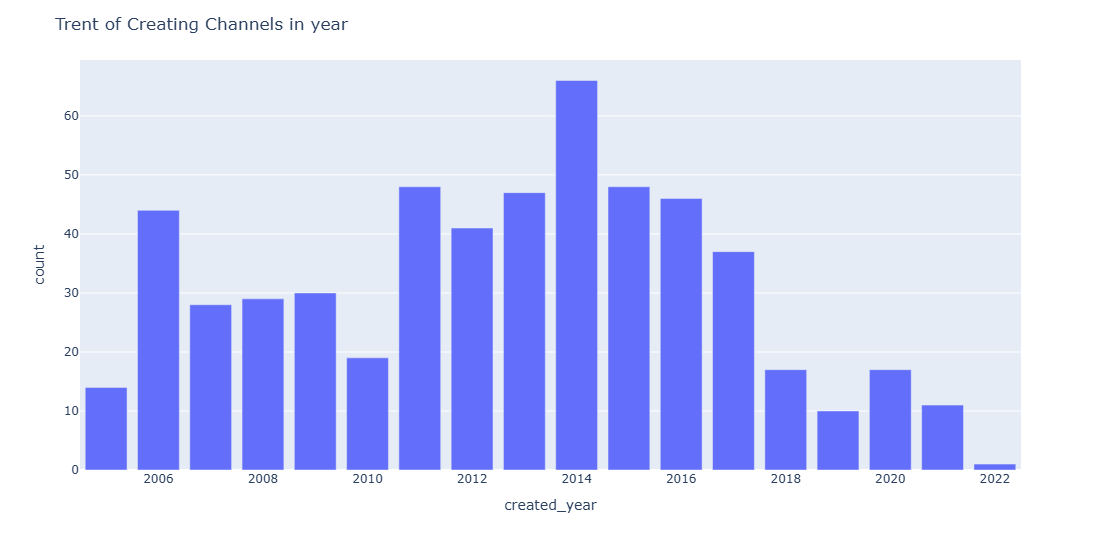

In [232]:
fig=px.bar(chanel_in_year,x='created_year',y='count')
fig.update_layout(width=1000,height=550,title='Trent of Creating Channels in year')

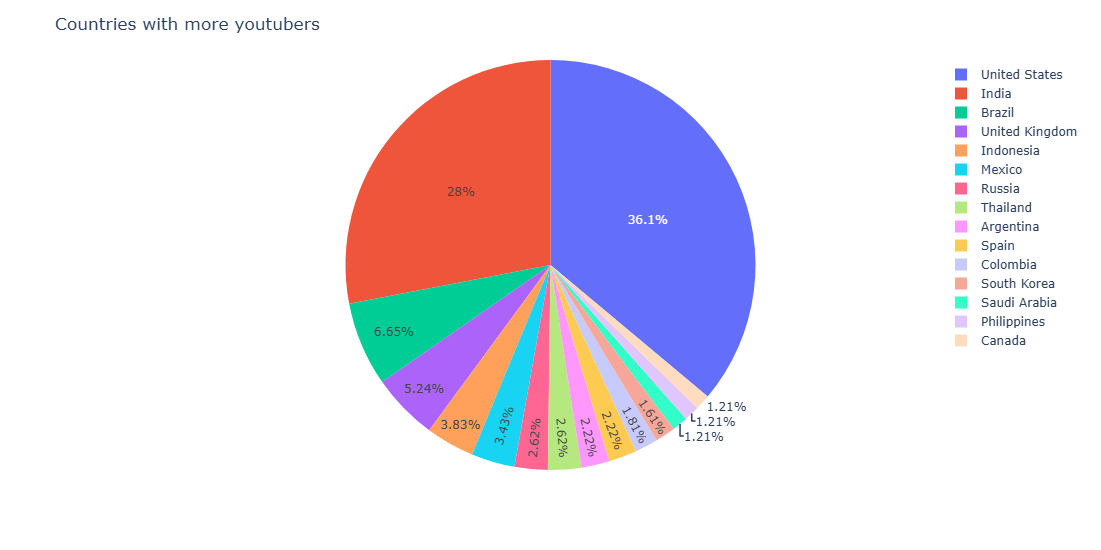

In [252]:
chanel_country=df.groupby('Country').agg({"Youtuber":"count"}).sort_values(by='Youtuber',ascending=False).reset_index().head(15)
fig=px.pie(chanel_country,names='Country',values='Youtuber')
fig.update_layout(width=1000,height=550,title='Countries with more youtubers')

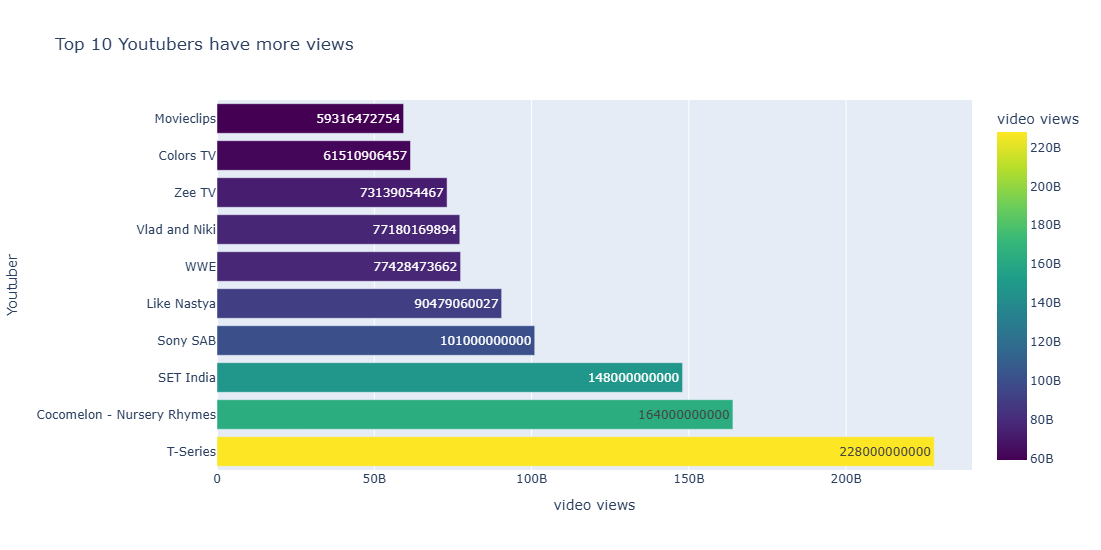

In [304]:
fig=px.bar(df.nlargest(10,'video views')[['Youtuber','video views']],x='video views',y='Youtuber',title='Top 10 Youtubers have more views',text='video views',color='video views',color_continuous_scale='viridis')
fig.update_layout(width=1000,height=550)
fig.show()

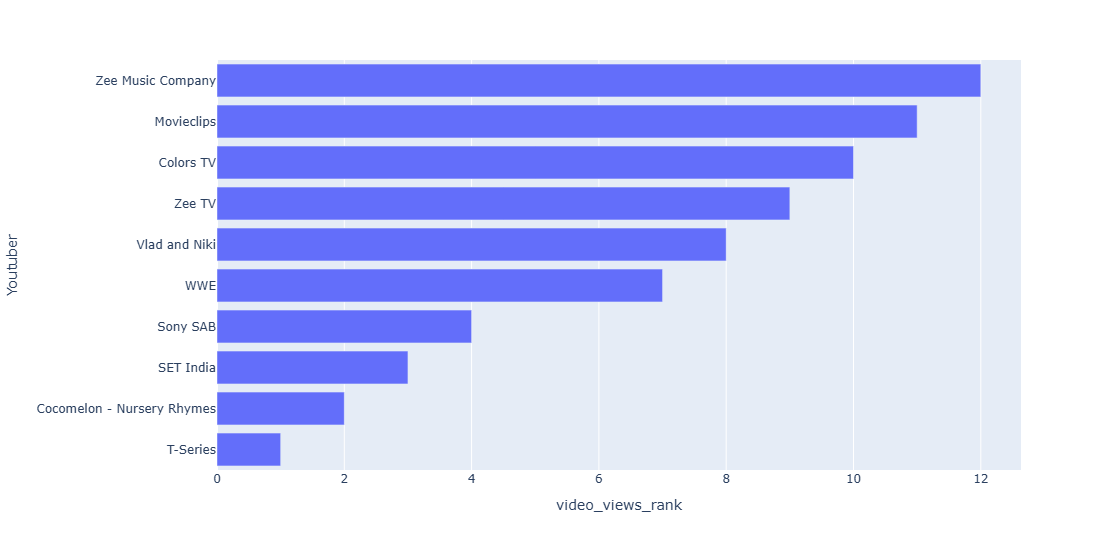

In [269]:
fig=px.bar(df.nsmallest(10,'video_views_rank')[['Youtuber','video_views_rank']],x='video_views_rank',y='Youtuber')
fig.update_layout(width=1000,height=550)
fig.show()

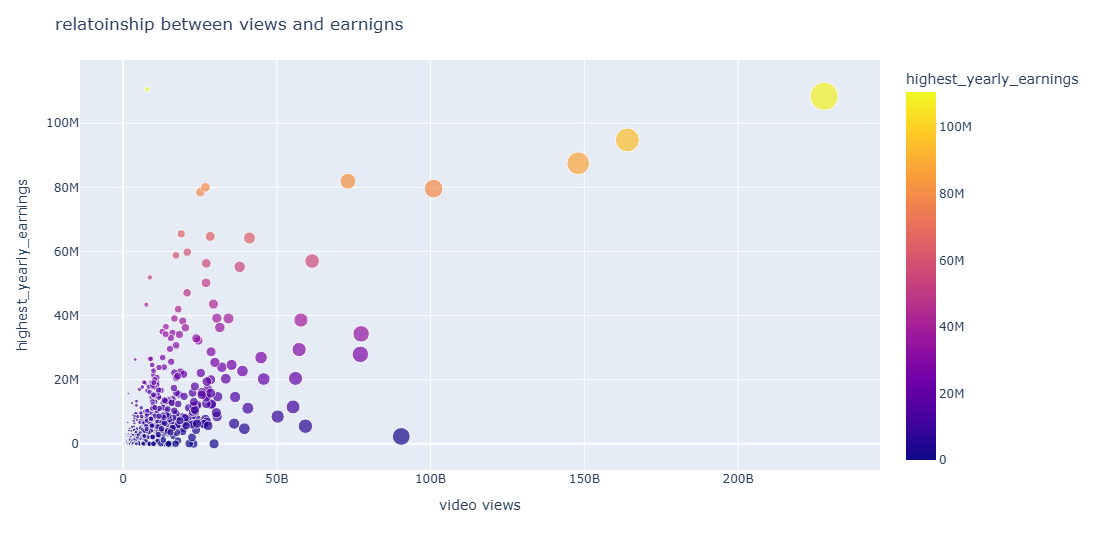

In [297]:
fig=px.scatter(df,x='video views',y='highest_yearly_earnings',color='highest_yearly_earnings',hover_name='Youtuber',size='video views')
fig.update_layout(width=1000,height=550,title='relatoinship between views and earnigns')
fig.show()

there are some channel who have high income but have comparitievly low views
##### so income is not only depennt on view count but also some other factors like video length and ads 

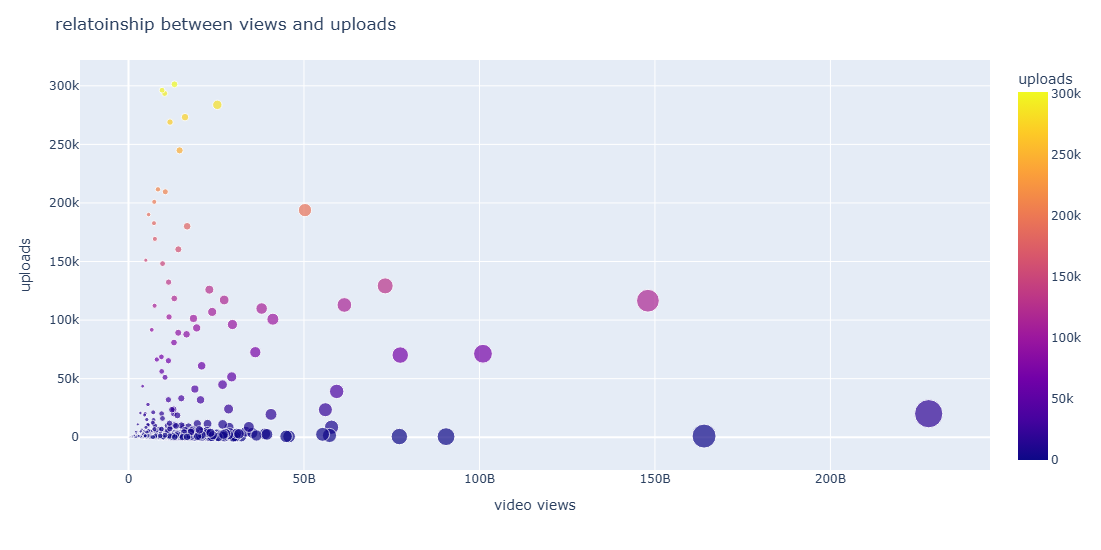

In [310]:
fig=px.scatter(df,x='video views',y='uploads',color='uploads',hover_name='Youtuber',size='video views')
fig.update_layout(width=1000,height=550,title='relatoinship between views and uploads')
fig.show()

the channels who upload more video will not ensure view count

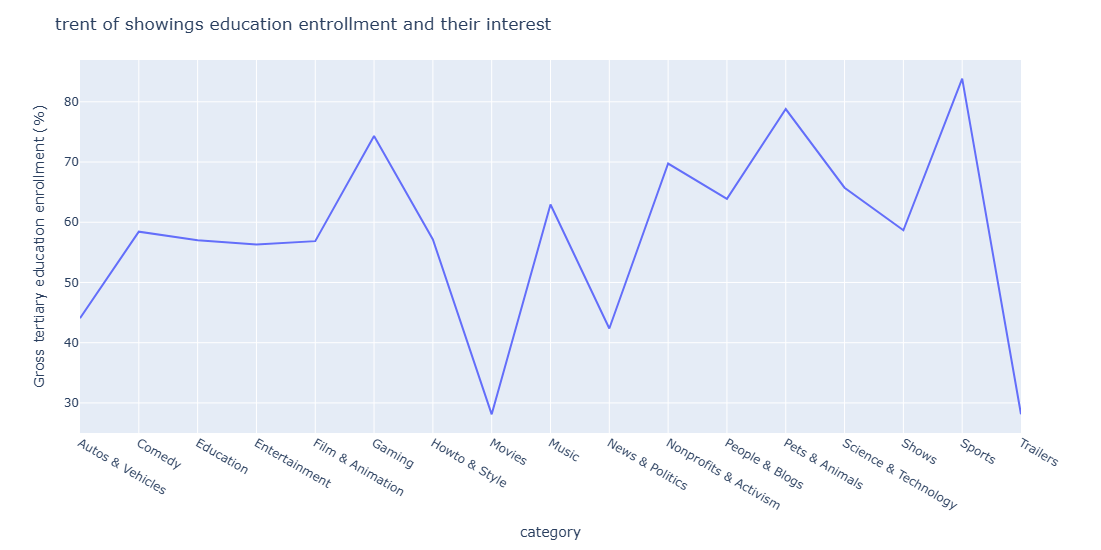

In [340]:
a=df.groupby('category').agg({"Gross tertiary education enrollment (%)":'mean'}).reset_index()
fig=px.line(a,x='category',y='Gross tertiary education enrollment (%)')
fig.update_layout(width=1000,height=550,title='trent of showings education entrollment and their interest')
fig.show()


from this graph we can understand educated society is more interested in sports ,gaming ,an